In [2]:
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.33, 
    rescale=1./255
    
)
train_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web',
    target_size=(224, 224),
    shuffle=True,
    class_mode='categorical',
    subset='training') 


val_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web', 
    target_size=(224, 224),
    shuffle=True,
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 8838 images belonging to 13 classes.
Found 4345 images belonging to 13 classes.
Found 13184 files belonging to 13 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


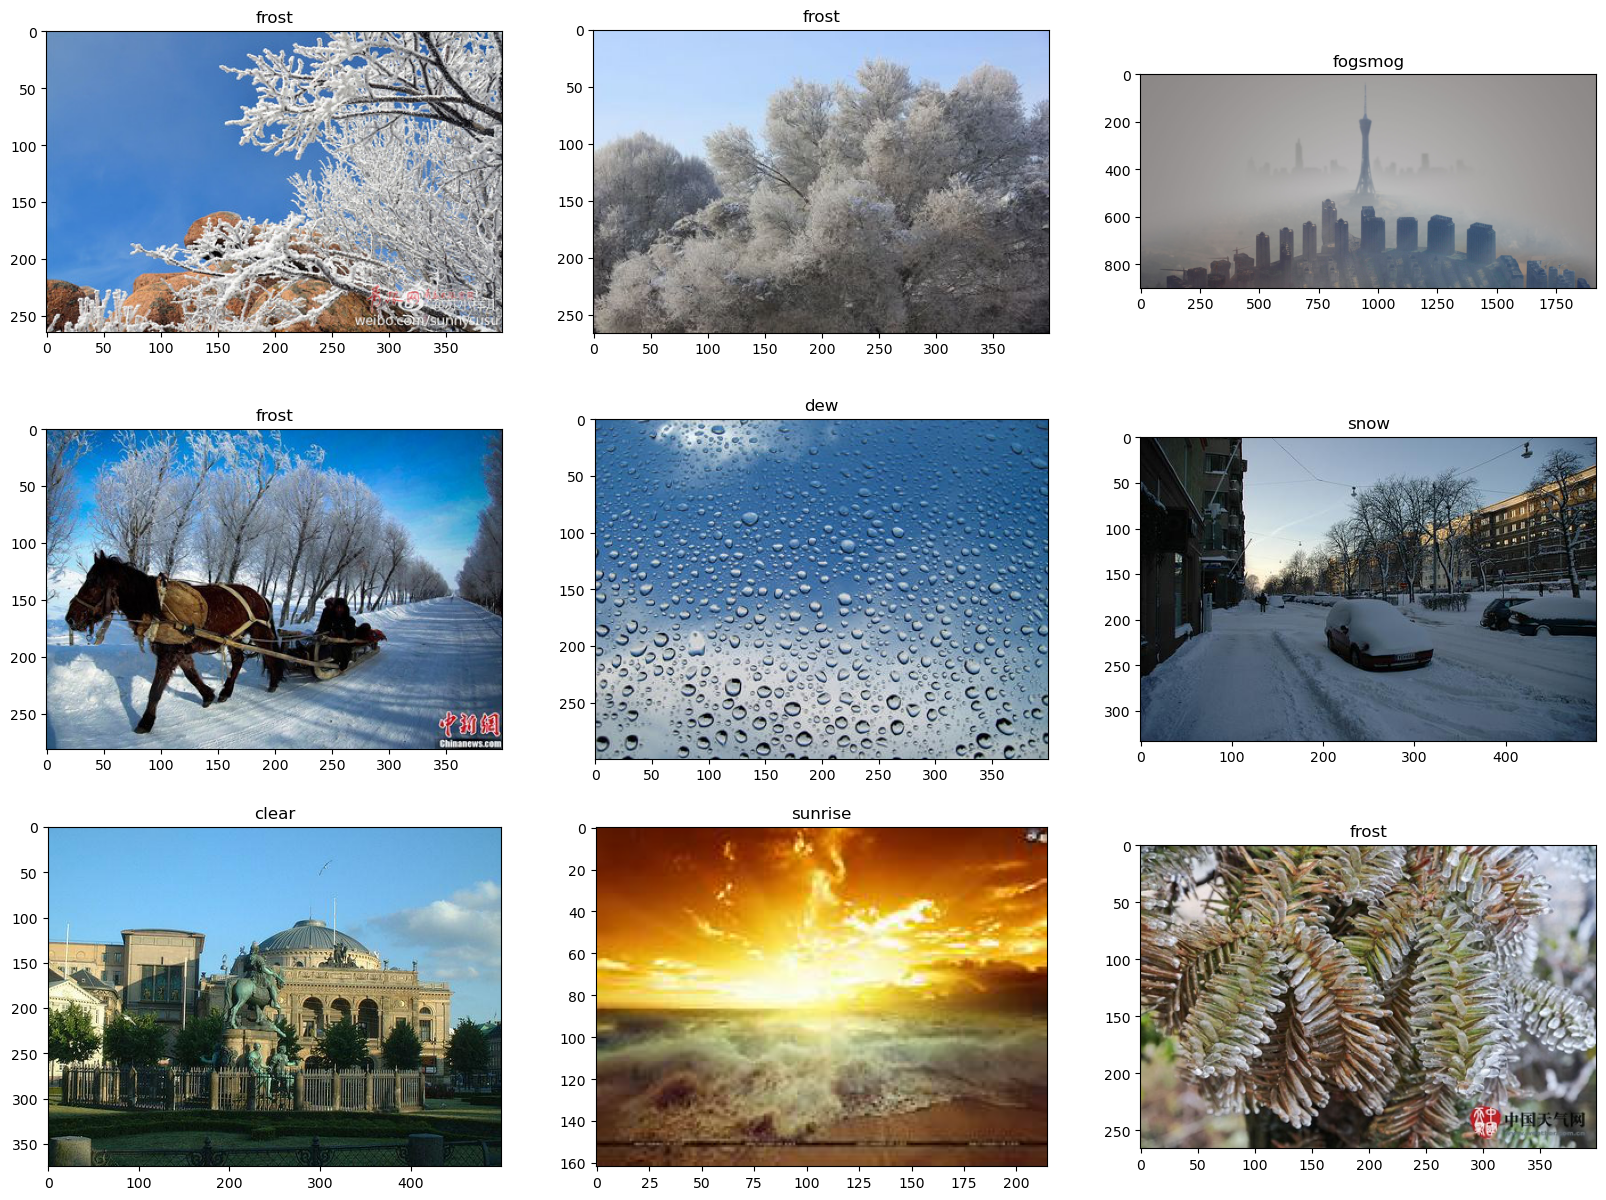

In [4]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [5]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [10]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
IMG_SHAPE = (224, 224, 3)
base_model =tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMG_SHAPE,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

base_model.trainable = False

In [7]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
base_model =tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=IMG_SHAPE,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
base_model.trainable = False

ValueError: When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (299, 299, 3).  Received: input_shape=(224, 224, 3)

In [13]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
)
model = Sequential([
    base_model,
    layers.Dense(224, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(13, activation = 'softmax')
])

model.compile(optimizer=adam_optimizer,
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1000)              143667240 
                                                                 
 dense_4 (Dense)             (None, 224)               224224    
                                                                 
 dropout_2 (Dropout)         (None, 224)               0         
                                                                 
 dense_5 (Dense)             (None, 13)                2925      
                                                                 
Total params: 143,894,389
Trainable params: 227,149
Non-trainable params: 143,667,240
_________________________________________________________________


In [22]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                             min_delta=0,
                                                             patience=2)])
results = model.evaluate(val_ds)


 76/277 [=======>......................] - ETA: 24:38 - loss: 2.5560 - accuracy: 0.1813

KeyboardInterrupt: 

In [ ]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

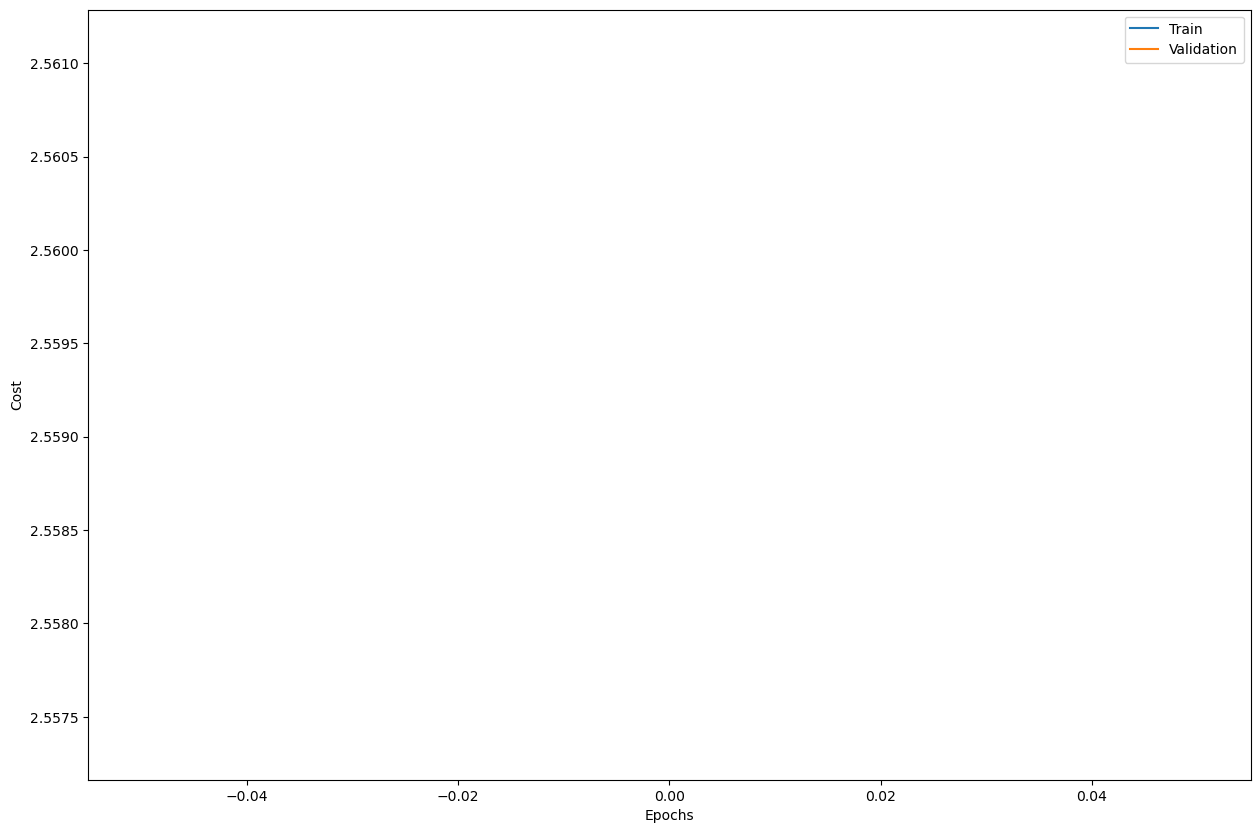

In [19]:
print_loss(history)

In [ ]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')

In [15]:
tf.config.list_physical_devices('GPU')

[]

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4199806603026618733
xla_global_id: -1
]
